<a href="https://colab.research.google.com/github/Lihini827/Diabetic-retinopathy-detection/blob/main/Train_modelGraph(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



https://www.pluralsight.com/guides/introduction-to-densenet-with-tensorflow



https://www.kaggle.com/code/ahmadjaenuddinubp/uts-deeplearning-epoch-20

https://www.kaggle.com/code/enasmudher/inceptionresnetv2-soft

https://www.kaggle.com/code/dkumarmehta/densese

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# Set a seed value
seed_value= 12321
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
model_d=Xception(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

x=model_d.output

x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x= Dropout(0.2)(x)
x= Dense(1024,activation='relu')(x)
x= Dense(128,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.2)(x)

preds=Dense(5,activation='softmax')(x) #FC-layer

83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
model=Model(inputs=model_d.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'] 

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False

for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'] 

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

In [ ]:
data=[]
labels=[]
random.seed(42)
imagePaths = sorted(list(os.listdir("/content/drive/MyDrive/auggrayscale/autobengramgrayaugtrain/")))
random.shuffle(imagePaths)
print(imagePaths)

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/auggrayscale/autobengramgrayaugtrain/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/auggrayscale/autobengramgrayaugtrain/"+img+'/'+i)
        image = cv2.resize(image, (224,224))
        image = img_to_array(image)
        data.append(image)
        l = label = img
        labels.append(l)

['Proliferate_DR', 'Moderate', 'No_DR', 'Severe', 'Mild']


In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)
mlb = LabelBinarizer()
labels = mlb.fit_transform(labels)
print(labels[0])

[0 0 0 1 0]


In [ ]:
(xtrain,ytrain)=(data,labels)
print(xtrain.shape,ytrain.shape)

(4666, 224, 224, 3) (4666, 5)


In [ ]:
dataTest=[]
labelTest=[]
random.seed(42)
imagePaths = sorted(list(os.listdir("/content/drive/MyDrive/auggrayscale/autobengramgrayaugtest/")))
random.shuffle(imagePaths)
print(imagePaths)

for img in imagePaths:
    path=sorted(list(os.listdir("/content/drive/MyDrive/auggrayscale/autobengramgrayaugtest/"+img)))
    for i in path:
        image = cv2.imread("/content/drive/MyDrive/auggrayscale/autobengramgrayaugtest/"+img+'/'+i)
        image = cv2.resize(image, (224,224))
        image = img_to_array(image)
        dataTest.append(image)
        l = label = img
        labelTest.append(l)

['Proliferate_DR', 'Moderate', 'No_DR', 'Severe', 'Mild']


In [ ]:
dataTest = np.array(dataTest, dtype="float32") / 255.0
labelTest = np.array(labelTest)
mlb = LabelBinarizer()
labelTest = mlb.fit_transform(labelTest)
print(labelTest[0])

[0 0 0 1 0]


In [ ]:
(xtest,ytest)=(dataTest,labelTest)
print(xtest.shape,ytest.shape)

(1164, 224, 224, 3) (1164, 5)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping

anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/checkpoint/new(demo)xeception(4).h5', verbose=1, save_best_only=True)
early_stopping=EarlyStopping(monitor='val_accuracy',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

datagen = ImageDataGenerator()


datagen.fit(xtrain)
# Fits-the-model
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=128),
               steps_per_epoch=xtrain.shape[0] //128,
               epochs=100,
               verbose=2,
               callbacks=[anne, checkpoint,early_stopping],
               validation_data=(xtrain, ytrain))

Epoch 1/100


<ipython-input-17-4c79945eee53>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=128),



Epoch 1: val_loss improved from inf to 1.18218, saving model to /content/drive/MyDrive/checkpoint/new(demo)xeception(4).h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


36/36 - 64s - loss: 1.3859 - accuracy: 0.5128 - val_loss: 1.1822 - val_accuracy: 0.5165 - lr: 0.0010 - 64s/epoch - 2s/step
Epoch 2/100

Epoch 2: val_loss improved from 1.18218 to 0.94689, saving model to /content/drive/MyDrive/checkpoint/new(demo)xeception(4).h5
36/36 - 37s - loss: 0.8690 - accuracy: 0.6569 - val_loss: 0.9469 - val_accuracy: 0.6372 - lr: 0.0010 - 37s/epoch - 1s/step
Epoch 3/100

Epoch 3: val_loss improved from 0.94689 to 0.87095, saving model to /content/drive/MyDrive/checkpoint/new(demo)xeception(4).h5
36/36 - 36s - loss: 0.6879 - accuracy: 0.7380 - val_loss: 0.8709 - val_accuracy: 0.6556 - lr: 0.0010 - 36s/epoch - 1s/step
Epoch 4/100

Epoch 4: val_loss improved from 0.87095 to 0.78169, saving model to /content/drive/MyDrive/checkpoint/new(demo)xeception(4).h5
36/36 - 36s - loss: 0.5754 - accuracy: 0.7843 - val_loss: 0.7817 - val_accuracy: 0.6745 - lr: 0.0010 - 36s/epoch - 1s/step
Epoch 5/100

Epoch 5: val_loss improved from 0.78169 to 0.69488, saving model to /conten

In [ ]:
from matplotlib import pyplot as plt

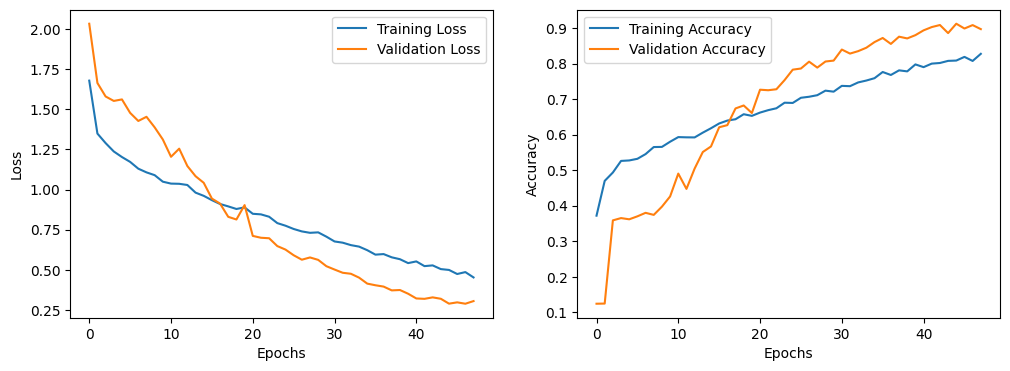

In [ ]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()